# Reading the data

In [1]:
import pandas as pd

file_path = 'HesapHareketleri_15.01.2024_0039039 (1).xlsx'

df = pd.read_excel(file_path, skiprows=8).head(-5)
df = df[['Tarih', 'Saat', 'Tutar', 'Bakiye', 'Açıklama']]


# Processing The Data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tarih     1089 non-null   object 
 1   Saat      1089 non-null   object 
 2   Tutar     1089 non-null   float64
 3   Bakiye    1089 non-null   float64
 4   Açıklama  1089 non-null   object 
dtypes: float64(2), object(3)
memory usage: 42.7+ KB


In [3]:
df = df.rename(columns={
    'Tarih': 'Date',
    'Saat': 'Time',
    'Tutar': 'Amount',
    'Bakiye': 'Balance',
    'Açıklama': 'Description'
})

df = df[df['Amount'] < 0]
df['Amount'] = df['Amount'].abs()

In [4]:
food_keywords = ['ISTANBUL PENDIK HARM', 'YEMEK', 'SIPAY', 'BURGER', 'BUFE', 'PIZZA',
                 'PİZZA', 'BIG CHEFS', 'KUCUK EV', 'ELVAN SOFRASI', 'MUTFAK', 'RESTAURANT', 'GIDA', 
                 'RESTORAN', 'KOPUKLU', 'QUBBE', 'FIYUU', 'SARIYER', 'CHINESE',
                 'SIMIT', 'CHA', 'EATALY', 'KFC', 'IYZICO', 'SUTIS', 'DÖNER','TIAN', 'PEHLIVAN', 'SUSHICO', 'KEBAP','YIYECEK', 'CAJUN', 'GREENWICH', 'DONDURMA', 'WAFFLE', 'KREME', 'ADILE', 'DÜRÜM', 'KAFE', 'LEZZET', 'HAPPYMOONS', 'DONER',
                'KOKOREC', 'KOPUKLU']
cafe_keywords = ['CAFFEE', 'COFFEE', 'NERO', 'COFFEETOPİA', 'CAFE', 'KAHVE', 'ESPERESSO',
                'STARBUCKS','LA VİE PRALİNE','PASTA LA VISTA','YUKSELEN YILDIZ','SABANCI UNIVERSITESI', 'ESPERESSO']

market_keywords = ['MARKET', 'MIGROS', 'ŞOK', 'TEKEL', 'UNLU MAMUL', 'MIGRO', 'MİGROS', 'SARKUTERI', 'SOK', 'BIM', 
                   'BÜFE', 'BUFE', 'CARREFOURSA', 'PETROL']

bank_transfer_keywords = ['7777', 'FAST', 'ATM']

shopping_keywords = ['TRENDYOL','UZAK', 'WATSONS', 'GRATIS', 'ROSSMAN', 'LCWAİKİKİ', 'N11', 'WATSON', 
                     'AKSESUAR', 'GRATİS', 'ZARA', 'TEKSTIL', 'MEDİA MARKT', 'VSFA', 'HILLTOWN', 'NISANTASI', 'NIKE',
                    'PENTİ', 'BERSHKA', 'PROCSIN','OYSHO', 'PENTI','SAYAPARK', 'AKTARIYE']

beauty_saloon_keywords = ['MERVE DUYGU TOPRAK', 'ÖZGUR DENİZ', 'GUZELLIK', 'KADIKOY BAHARIYE']

fun_keywords= ['AKVARYUM', 'OBİLET', 'DOLMABAHCE', 'SARAYLAR', 'OTEL', 'EGLENCE', 'ISPARK']
transportation = ['GUR-SEL', 'BITAKSI', 'TAKSIDE']
# Categorize based on keywords
for index, row in df.iterrows():
    description = row['Description'].lower()
    if any(keyword.lower() in description for keyword in beauty_saloon_keywords):
        df.at[index, 'Category'] = 'Beauty Saloon'
    elif any(keyword.lower() in description for keyword in bank_transfer_keywords):
        df.at[index, 'Category'] = 'Bank Transfer'
    elif any(keyword.lower() in description for keyword in market_keywords):
        df.at[index, 'Category'] = 'Market'
    elif any(keyword.lower() in description for keyword in food_keywords):
        df.at[index, 'Category'] = 'Food'
    elif any(keyword.lower() in description for keyword in shopping_keywords):
        df.at[index, 'Category'] = 'Shopping'
    elif any(keyword.lower() in description for keyword in fun_keywords):
        df.at[index, 'Category'] = 'Fun'
    elif any(keyword.lower() in description for keyword in transportation):
        df.at[index, 'Category'] = 'Transportation'
    elif any(keyword.lower() in description for keyword in cafe_keywords):
        df.at[index, 'Category'] = 'Cafe'
    else:
        df.at[index, 'Category'] = 'Other'

In [5]:
df.loc[df['Description'].str.contains('032 YUKSELEN YILDIZ TURI'), 'Description'] = 'FASSHANE'
df.loc[df['Description'].str.contains('205 SELF GIDA SANAYI'), 'Description'] = 'PIAZZA'
df.loc[df['Description'].str.contains('010 ATLI PETROL'), 'Description'] = 'SABANCI OPET'
df.loc[df['Description'].str.contains('YEMEKSEPETİ MARKET'), 'Description'] = 'YEMEKSEPETİ MARKET'
df.loc[df['Description'].str.contains('YEMEK SEPETI MARKET'), 'Description'] = 'YEMEKSEPETİ MARKET'
df.loc[df['Description'].str.contains('046 YEMEKSEPETİ'), 'Description'] = 'YEMEKSEPETİ'
df.loc[df['Description'].str.contains('KUCUK EV SABANCI'), 'Description'] = 'KÜÇÜK EV'
df.loc[df['Description'].str.contains('MIGROS'), 'Description'] = 'MİGROS'
df.loc[df['Description'].str.contains('046 ISTANBUL PENDIK HARM'), 'Description'] = 'MİGROS'
df.loc[df['Description'].str.contains('010 SABANCI UNIVERSITESI'), 'Description'] = 'SABANCI COFFY'
df.loc[df['Description'].str.contains('062 SABANCI UNIVERSITESI'), 'Description'] = 'SABANCI UNIVERSITESI'
df.loc[df['Description'].str.contains('TRENDYOL'), 'Description'] = 'TRENDYOL'
df.loc[df['Description'].str.contains('BERSHKA'), 'Description'] = 'BERSHKA'
df.loc[df['Description'].str.contains('ZARA'), 'Description'] = 'ZARA'
df.loc[df['Description'].str.contains('OYSHO'), 'Description'] = 'OYSHO'
df.loc[df['Description'].str.contains('PENTI'), 'Description'] = 'PENTİ'
df.loc[df['Description'].str.contains('PENTİ'), 'Description'] = 'PENTİ'
df.loc[df['Description'].str.contains('ISPARK'), 'Description'] = 'ISPARK'
df.loc[df['Description'].str.contains('N11'), 'Description'] = 'N11'
df.loc[df['Description'].str.contains('GUR-SEL'), 'Description'] = 'GÜRSEL'
df.loc[df['Description'].str.contains('PAPARA'), 'Description'] = 'PAPARA'
df.loc[df['Description'].str.contains('GRATİS'), 'Description'] = 'GRATİS'
df.loc[df['Description'].str.contains('GRATIS'), 'Description'] = 'GRATİS'
df.loc[df['Description'].str.contains('TAKSIDE'), 'Description'] = 'TAKSİ'
df.loc[df['Description'].str.contains('OTOMAT'), 'Description'] = 'OTOMAT'
df.loc[df['Description'].str.contains('ŞOK'), 'Description'] = 'SABANCI ŞOK'
df.loc[df['Description'].str.contains('SOK'), 'Description'] = 'SABANCI ŞOK'
df.loc[df['Description'].str.contains('PAPARA'), 'Description'] = 'PAPARA'
df.loc[df['Description'].str.contains('EFT'), 'Description'] = 'EFT'
df.loc[df['Description'].str.contains('064 EKMOT'), 'Description'] = 'ESPRESSOLAB'
df.loc[df['Description'].str.contains('COFFEETOPİA'), 'Description'] = 'COFFEETOPİA'
df.loc[df['Description'].str.contains('GORGONZO PIZZA'), 'Description'] = 'GORGONZO PIZZA'
df.loc[df['Description'].str.contains('ESPERESSO'), 'Description'] = 'ESPERESSO'
df.loc[df['Description'].str.contains('KOPUKLU'), 'Description'] = 'KOPUKLU'
df.loc[df['Description'].str.contains('HMR'), 'Description'] = 'HMR RESTORAN GIDA'
df.loc[df['Description'].str.contains('TEKEL'), 'Description'] = 'TEKEL'
df.loc[df['Description'].str.contains('MARMARIS'), 'Description'] = 'ATASEHIR MARMARIS'
df.loc[df['Description'].str.contains('SAMET'), 'Description'] = 'SAMET GUNDUGDU'
df.loc[df['Description'].str.contains('PILAV'), 'Description'] = 'PILAVCI'

In [6]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
# Extract the day of the week and create a new column
df['DayOfWeek'] = df['Date'].dt.day_name()
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
# Extract year and month for time-series analysis
df['YearMonth'] = df['Date'].dt.to_period('M')
df['Next_Spending'] = df['Description'].shift(1)
df['Hour'] = df['Time'].apply(lambda x: pd.to_datetime(x, format='%H:%M').hour)
df['TimeOfDay'] = pd.cut(df['Hour'], bins=[0, 12, 18, 24], labels=['Morning', 'Afternoon', 'Evening'])
df.reset_index(drop=True, inplace=True)

In [7]:
df_first = df[df['Date'] <= '2023-07-01']
df_second = df[df['Date'] > '2023-07-01']
df_first.reset_index(drop=True, inplace=True)
df_second.reset_index(drop=True, inplace=True)
first_weekday_df = df_first[df_first['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
first_weekend_df = df_first[df_first['DayOfWeek'].isin(['Saturday', 'Sunday'])]
second_weekday_df = df_second[df_second['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
second_weekend_df = df_second[df_second['DayOfWeek'].isin(['Saturday', 'Sunday'])]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           977 non-null    datetime64[ns]
 1   Time           977 non-null    object        
 2   Amount         977 non-null    float64       
 3   Balance        977 non-null    float64       
 4   Description    977 non-null    object        
 5   Category       977 non-null    object        
 6   Year           977 non-null    int32         
 7   Month          977 non-null    int32         
 8   DayOfWeek      977 non-null    object        
 9   WeekOfYear     977 non-null    UInt32        
 10  YearMonth      977 non-null    period[M]     
 11  Next_Spending  976 non-null    object        
 12  Hour           977 non-null    int64         
 13  TimeOfDay      977 non-null    category      
dtypes: UInt32(1), category(1), datetime64[ns](1), float64(2), int32(2), int64(

# Overall Spending Habits

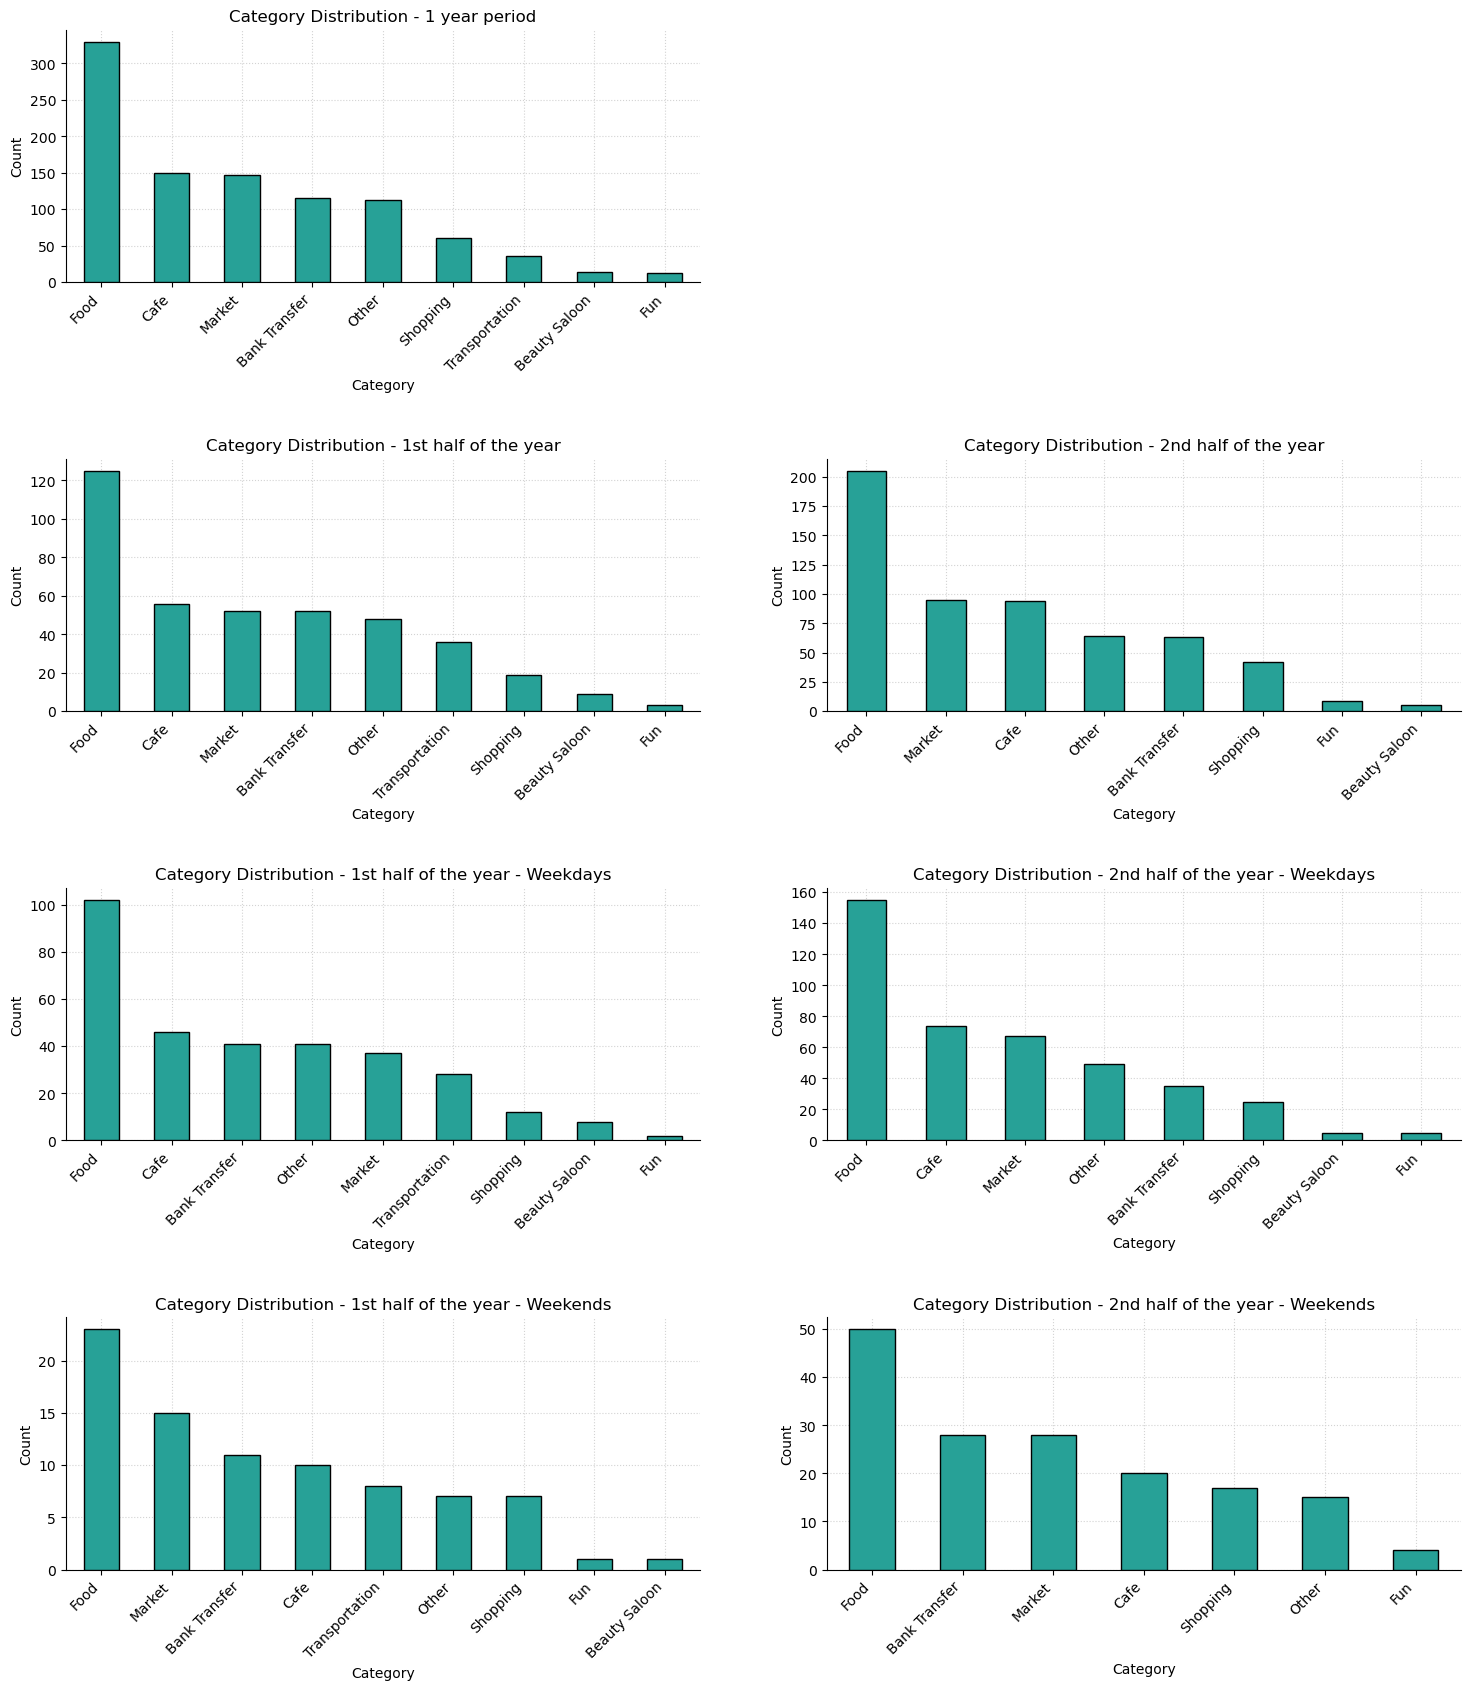

In [9]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np


# Create a function to plot the category distribution for each subplot
def plot_category_distribution(ax, df, title):
    df['Category'].value_counts().plot(kind='bar', color='#27a197', ax=ax,ec = "black", zorder = 3,)
    ax.grid(True, color = "lightgrey", ls = ":")
    ax.set_title(title)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)

# Create a 2x4 grid of subplots
fig = plt.figure(figsize=(18, 20))
gs = gridspec.GridSpec(4, 2, width_ratios=[1, 1], wspace=0.2, hspace=0.7) 

# Plot each subplot
ax1 = plt.subplot(gs[0, 0])
plot_category_distribution(ax1, df, 'Category Distribution - 1 year period')

ax2 = plt.subplot(gs[1, 0])
plot_category_distribution(ax2, df_first, 'Category Distribution - 1st half of the year')

ax3 = plt.subplot(gs[1, 1])
plot_category_distribution(ax3, df_second, 'Category Distribution - 2nd half of the year')

ax4 = plt.subplot(gs[2, 0])
plot_category_distribution(ax4, first_weekday_df, 'Category Distribution - 1st half of the year - Weekdays')

ax5 = plt.subplot(gs[3, 0])
plot_category_distribution(ax5, first_weekend_df, 'Category Distribution - 1st half of the year - Weekends')

ax6 = plt.subplot(gs[2, 1])
plot_category_distribution(ax6, second_weekday_df, 'Category Distribution - 2nd half of the year - Weekdays')

ax7 = plt.subplot(gs[3, 1])
plot_category_distribution(ax7, second_weekend_df, 'Category Distribution - 2nd half of the year - Weekends')


plt.show()

Throughout the year, the top category on which I spent my money is food, followed by cafes and markets.

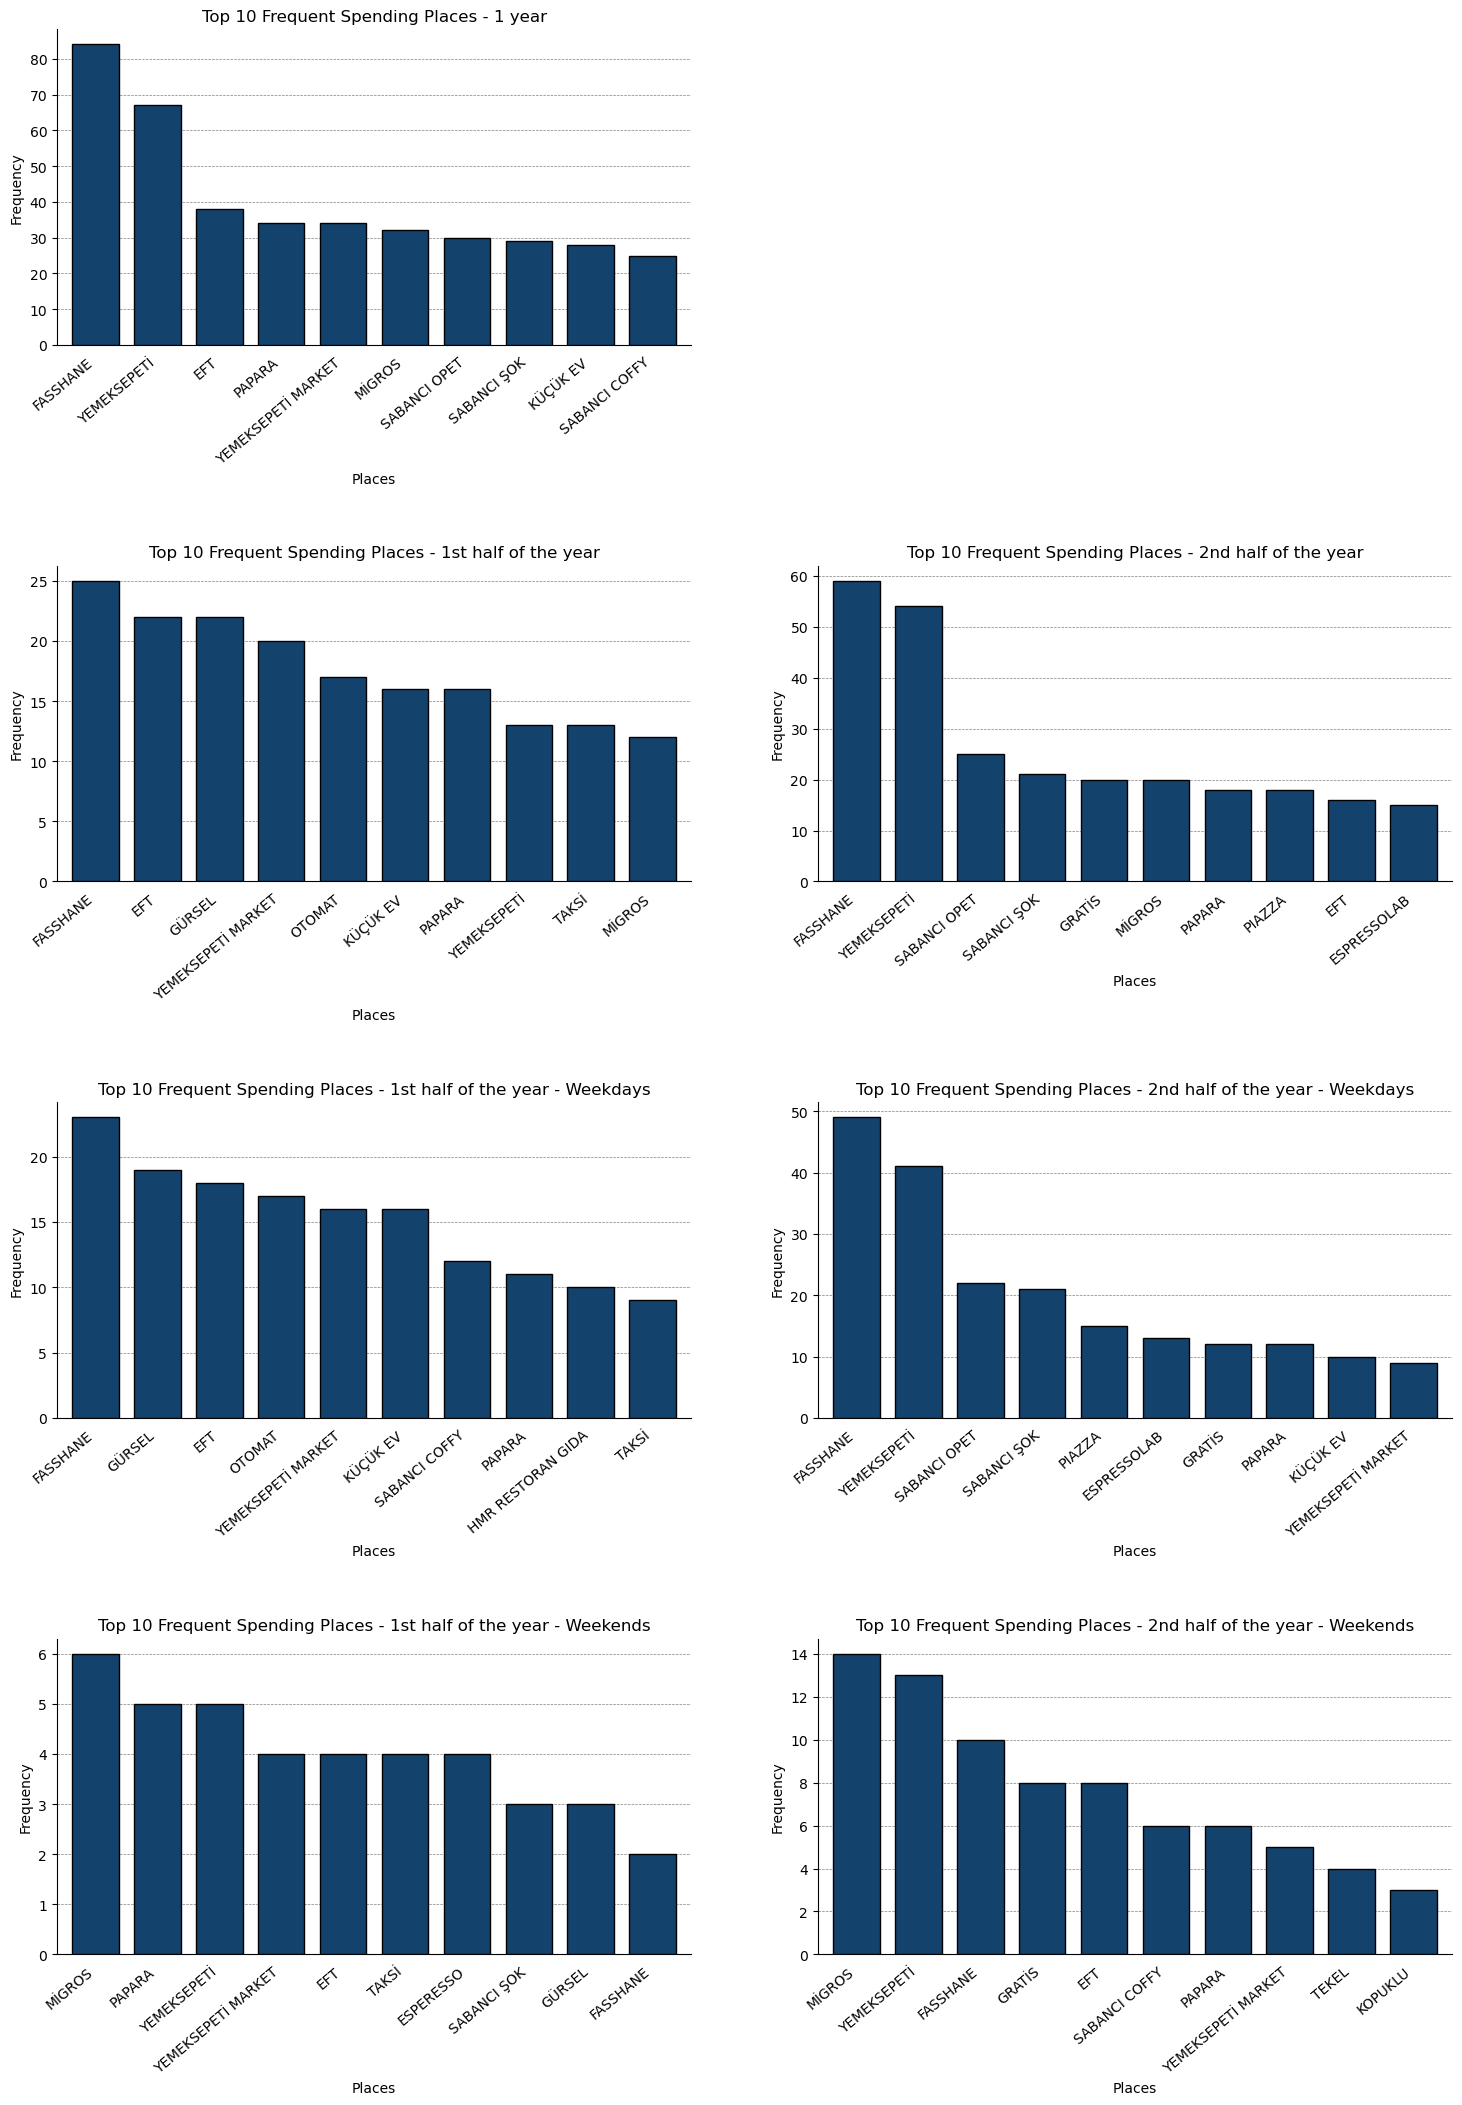

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Function to plot top places
def plot_top_places(ax, df, title):
    top_places = df['Description'].value_counts().head(10)
    top_places.plot(kind='bar', ax=ax, ec = "black", color = "#13436d", zorder = 3, width = 0.75)
    ax.set_title(title)
    ax.set_xlabel('Places')
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(top_places.index, rotation=40, ha='right')
    ax.tick_params(axis='x', which='both', bottom=False, top=False) 
    ax.grid(axis='y', linestyle='--', color='gray', linewidth=0.5)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)

# Create a 2x4 grid of subplots
fig = plt.figure(figsize=(18, 25))
gs = gridspec.GridSpec(4, 2, width_ratios=[1, 1], hspace=0.7)

# Plot each subplot
ax1 = plt.subplot(gs[0, 0])
plot_top_places(ax1, df, 'Top 10 Frequent Spending Places - 1 year')

ax2 = plt.subplot(gs[1, 0])
plot_top_places(ax2, df_first, 'Top 10 Frequent Spending Places - 1st half of the year')

ax3 = plt.subplot(gs[1, 1])
plot_top_places(ax3, df_second, 'Top 10 Frequent Spending Places - 2nd half of the year')

ax4 = plt.subplot(gs[2, 0])
plot_top_places(ax4, first_weekday_df, 'Top 10 Frequent Spending Places - 1st half of the year - Weekdays')

ax5 = plt.subplot(gs[2, 1])
plot_top_places(ax5, second_weekday_df, 'Top 10 Frequent Spending Places - 2nd half of the year - Weekdays')

ax6 = plt.subplot(gs[3, 0])
plot_top_places(ax6, first_weekend_df, 'Top 10 Frequent Spending Places - 1st half of the year - Weekends')

ax7 = plt.subplot(gs[3, 1])
plot_top_places(ax7, second_weekend_df, 'Top 10 Frequent Spending Places - 2nd half of the year - Weekends')

plt.show()

In both periods, first and second half of the year, I have mostly spent money in Fasshane on weekdays.

During my weekends, I seem to have a consistent habit of doing grocery shopping at Migros.

One of the significant differences between the first and second halves is transportation. In the second period, I had a car, and my expenses for Gursel and taxi decreased significantly. Instead, I developed a habit of stopping at Opet while coming to school.

I have started to go to Fasshane much more in the second period.

In the first period, I used to eat most of my meals in a Küçük Ev on campus, but now it has shifted to Piazza.

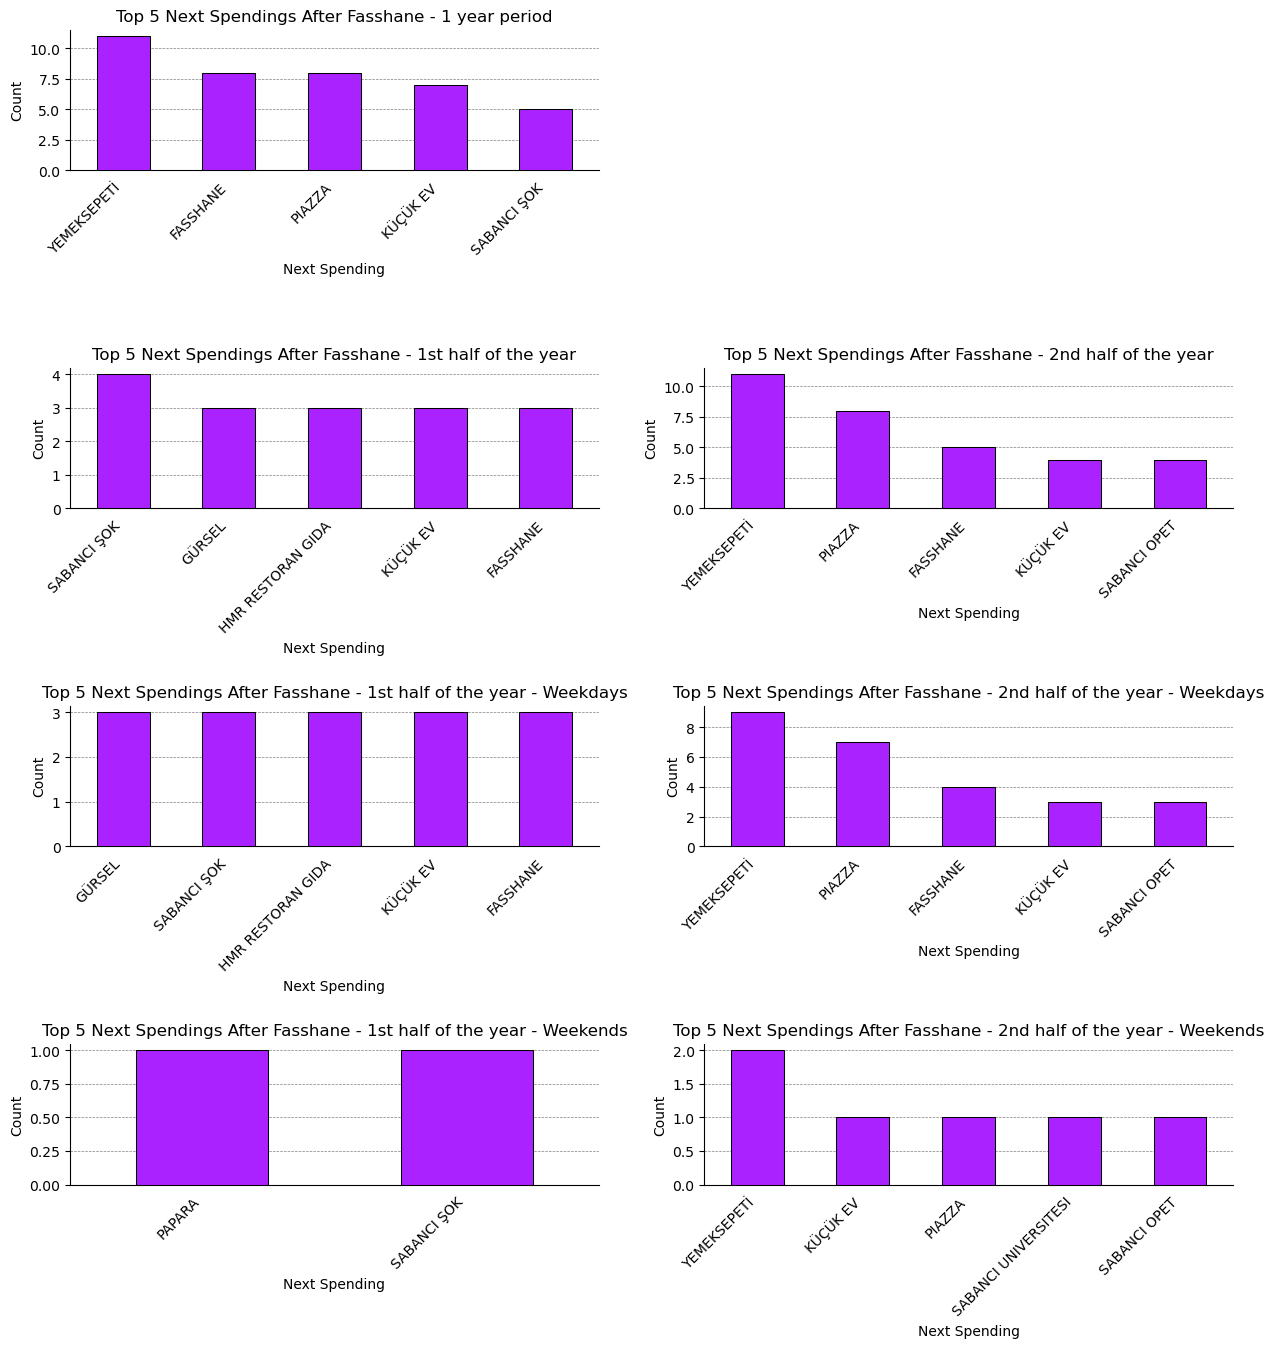

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Function to plot top next spendings after 'fasshane'
def plot_top_next_spending(ax, df, title):
    fasshane_df = df[df['Description'] == 'FASSHANE']
    
    top_next_spending = fasshane_df['Next_Spending'].value_counts().head(5)
    top_next_spending.plot(kind='bar', color='#aa22ff',  ax=ax, ec = "black", lw = .75, zorder = 3, 
    width = 0.5)
    ax.set_title(title)
    ax.set_xlabel('Next Spending')
    ax.set_ylabel('Count')
    ax.set_xticklabels(top_next_spending.index, rotation=45, ha='right')  # Rotate x-axis labels
    ax.tick_params(axis='x', which='both', bottom=False, top=False)  # Hide x-axis ticks
    ax.grid(axis='y', linestyle='--', color='gray', linewidth=0.5)  # Add horizontal grid lines
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)


# Create a 3x3 grid of subplots
fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(4, 2, width_ratios=[1,1], wspace=0.2, hspace=1.4)  # Adjust space between subplots

# Plot each subplot
ax0 = plt.subplot(gs[0, 0])
plot_top_next_spending(ax0, df, 'Top 5 Next Spendings After Fasshane - 1 year period')

ax1 = plt.subplot(gs[1, 0])
plot_top_next_spending(ax1, df_first, 'Top 5 Next Spendings After Fasshane - 1st half of the year')

ax2 = plt.subplot(gs[1, 1])
plot_top_next_spending(ax2, df_second, 'Top 5 Next Spendings After Fasshane - 2nd half of the year')

ax3 = plt.subplot(gs[2, 0])
plot_top_next_spending(ax3, first_weekday_df, 'Top 5 Next Spendings After Fasshane - 1st half of the year - Weekdays')

ax4 = plt.subplot(gs[2, 1])
plot_top_next_spending(ax4, second_weekday_df, 'Top 5 Next Spendings After Fasshane - 2nd half of the year - Weekdays')

ax5 = plt.subplot(gs[3, 0])
plot_top_next_spending(ax5, first_weekend_df, 'Top 5 Next Spendings After Fasshane - 1st half of the year - Weekends')

ax6 = plt.subplot(gs[3, 1])
plot_top_next_spending(ax6, second_weekend_df, 'Top 5 Next Spendings After Fasshane - 2nd half of the year - Weekends')


plt.show()

After Fasshane, among the things I most frequently do, there are expenses from Gürsel and Yemek Sepeti. This indicates that I am inclined to go home after sitting at Fasshane.

If I continue to stay at school after spending at Fasshane, the first thing I spend money on is food.

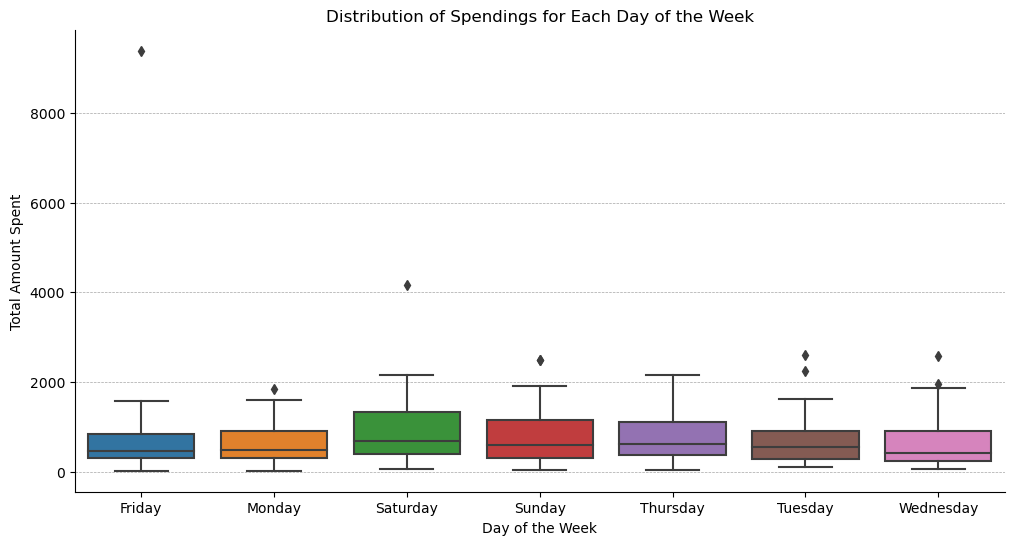

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by day of the week and calculate the total spending for each day
daily_total_spending = df.groupby(['DayOfWeek', 'Date'])['Amount'].sum().reset_index()

# Create a boxplot to visualize the distribution of total spending for each day
plt.figure(figsize=(12, 6))
sns.boxplot(x='DayOfWeek', y='Amount', data=daily_total_spending)
plt.title('Distribution of Spendings for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Amount Spent')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray', linewidth=0.5)

# Access the Axes object and set spines
ax = plt.gca()
ax.spines["top"].set(visible=False)
ax.spines["right"].set(visible=False)

plt.show()

In general, my expenses on weekends show more variation. I tend to be a bit more inclined to spend on Saturdays.

# Eating Habits

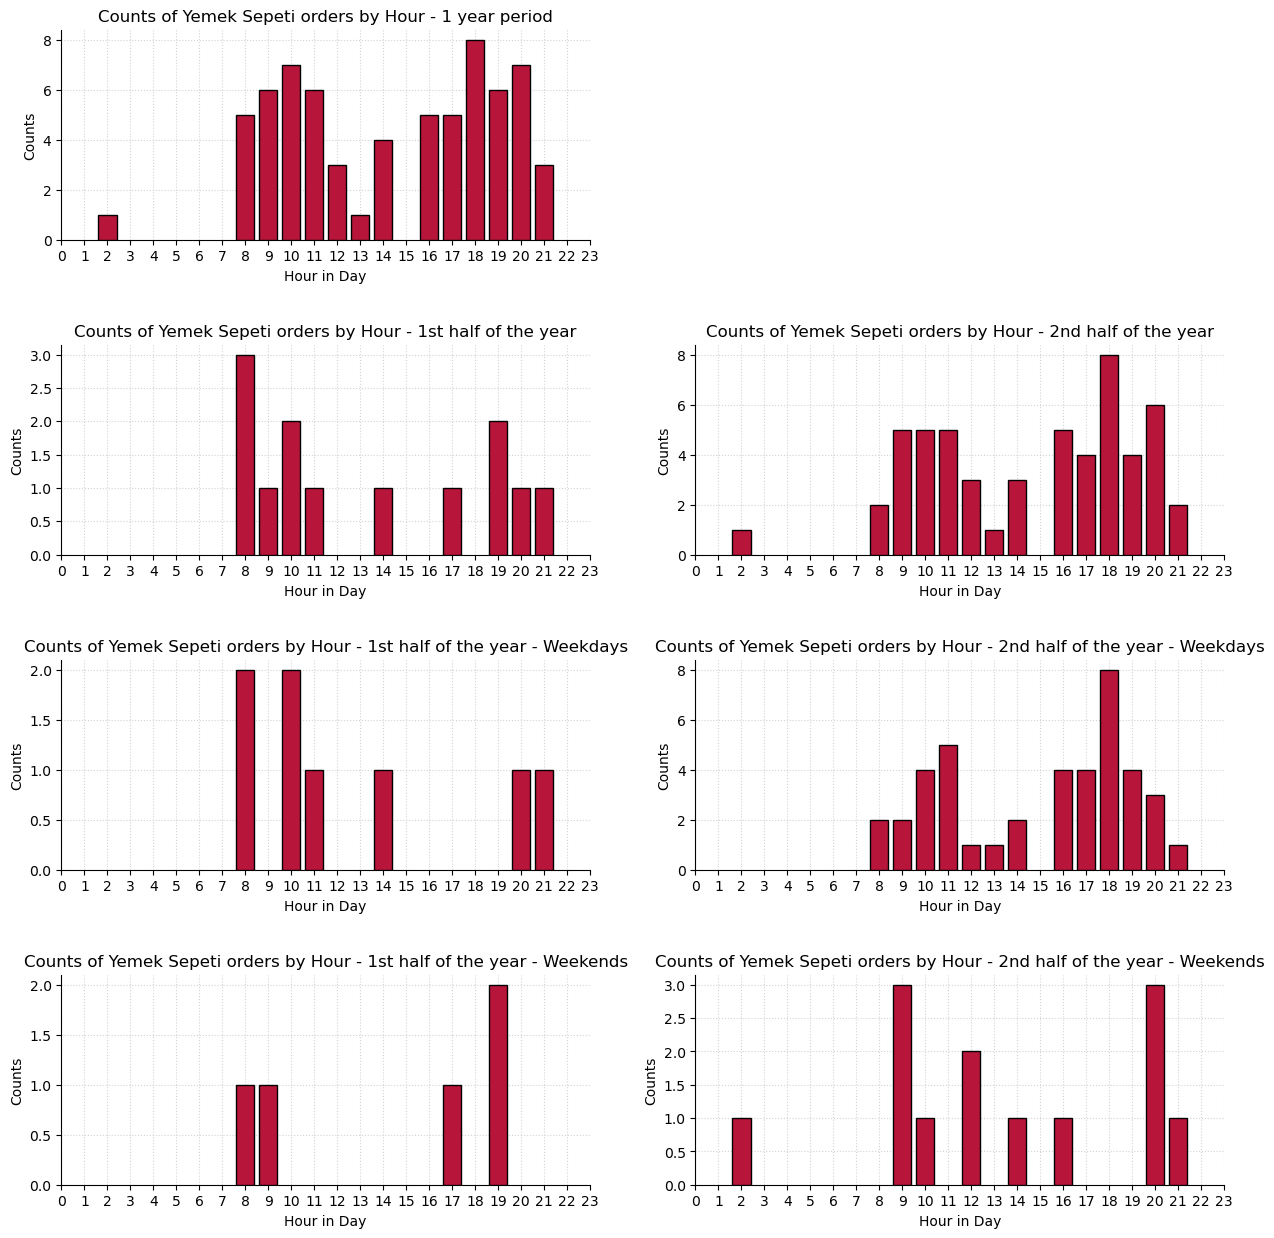

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

def plot_yemeksepeti_counts(ax, df, title):
    filtered_df = df[df['Description'] == 'YEMEKSEPETİ']
    hourly_counts = filtered_df['Hour'].value_counts().sort_index()
    ax.bar(hourly_counts.index, hourly_counts.values, color='#b7153a',ec = "black", zorder = 3)
    ax.set_title(title)
    ax.set_xlabel('Hour in Day')
    ax.set_ylabel('Counts')
    ax.set_xticks(range(24))
    ax.grid(True, color = "lightgrey", ls = ":")
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)

# Create a 2x3 grid of subplots
fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(4, 2, width_ratios=[1, 1], wspace=0.2, hspace=0.5)

# Plot each subplot
ax1 = plt.subplot(gs[0, 0])
plot_yemeksepeti_counts(ax1, df, 'Counts of Yemek Sepeti orders by Hour - 1 year period')

ax2 = plt.subplot(gs[1, 0])
plot_yemeksepeti_counts(ax2, df_first, 'Counts of Yemek Sepeti orders by Hour - 1st half of the year')

ax3 = plt.subplot(gs[1, 1])
plot_yemeksepeti_counts(ax3, df_second, 'Counts of Yemek Sepeti orders by Hour - 2nd half of the year')

ax4 = plt.subplot(gs[2, 0])
plot_yemeksepeti_counts(ax4, first_weekday_df, 'Counts of Yemek Sepeti orders by Hour - 1st half of the year - Weekdays')

ax5 = plt.subplot(gs[2, 1])
plot_yemeksepeti_counts(ax5, second_weekday_df, 'Counts of Yemek Sepeti orders by Hour - 2nd half of the year - Weekdays')

ax6 = plt.subplot(gs[3, 0])
plot_yemeksepeti_counts(ax6, first_weekend_df, 'Counts of Yemek Sepeti orders by Hour - 1st half of the year - Weekends')

ax7 = plt.subplot(gs[3, 1])
plot_yemeksepeti_counts(ax7, second_weekend_df, 'Counts of Yemek Sepeti orders by Hour - 2nd half of the year - Weekends')


plt.show()

The number of times I order from Yemek Sepeti has increased in the second half of the year compared to the first half, indicating that I have developed a habit of eating at home more frequently.

I have a more regular eating habit during weekdays; two meal times are more organized, while weekends are more scattered.

This might indicate that the pencentage of the money I spent on food increased in the second in the second half. 

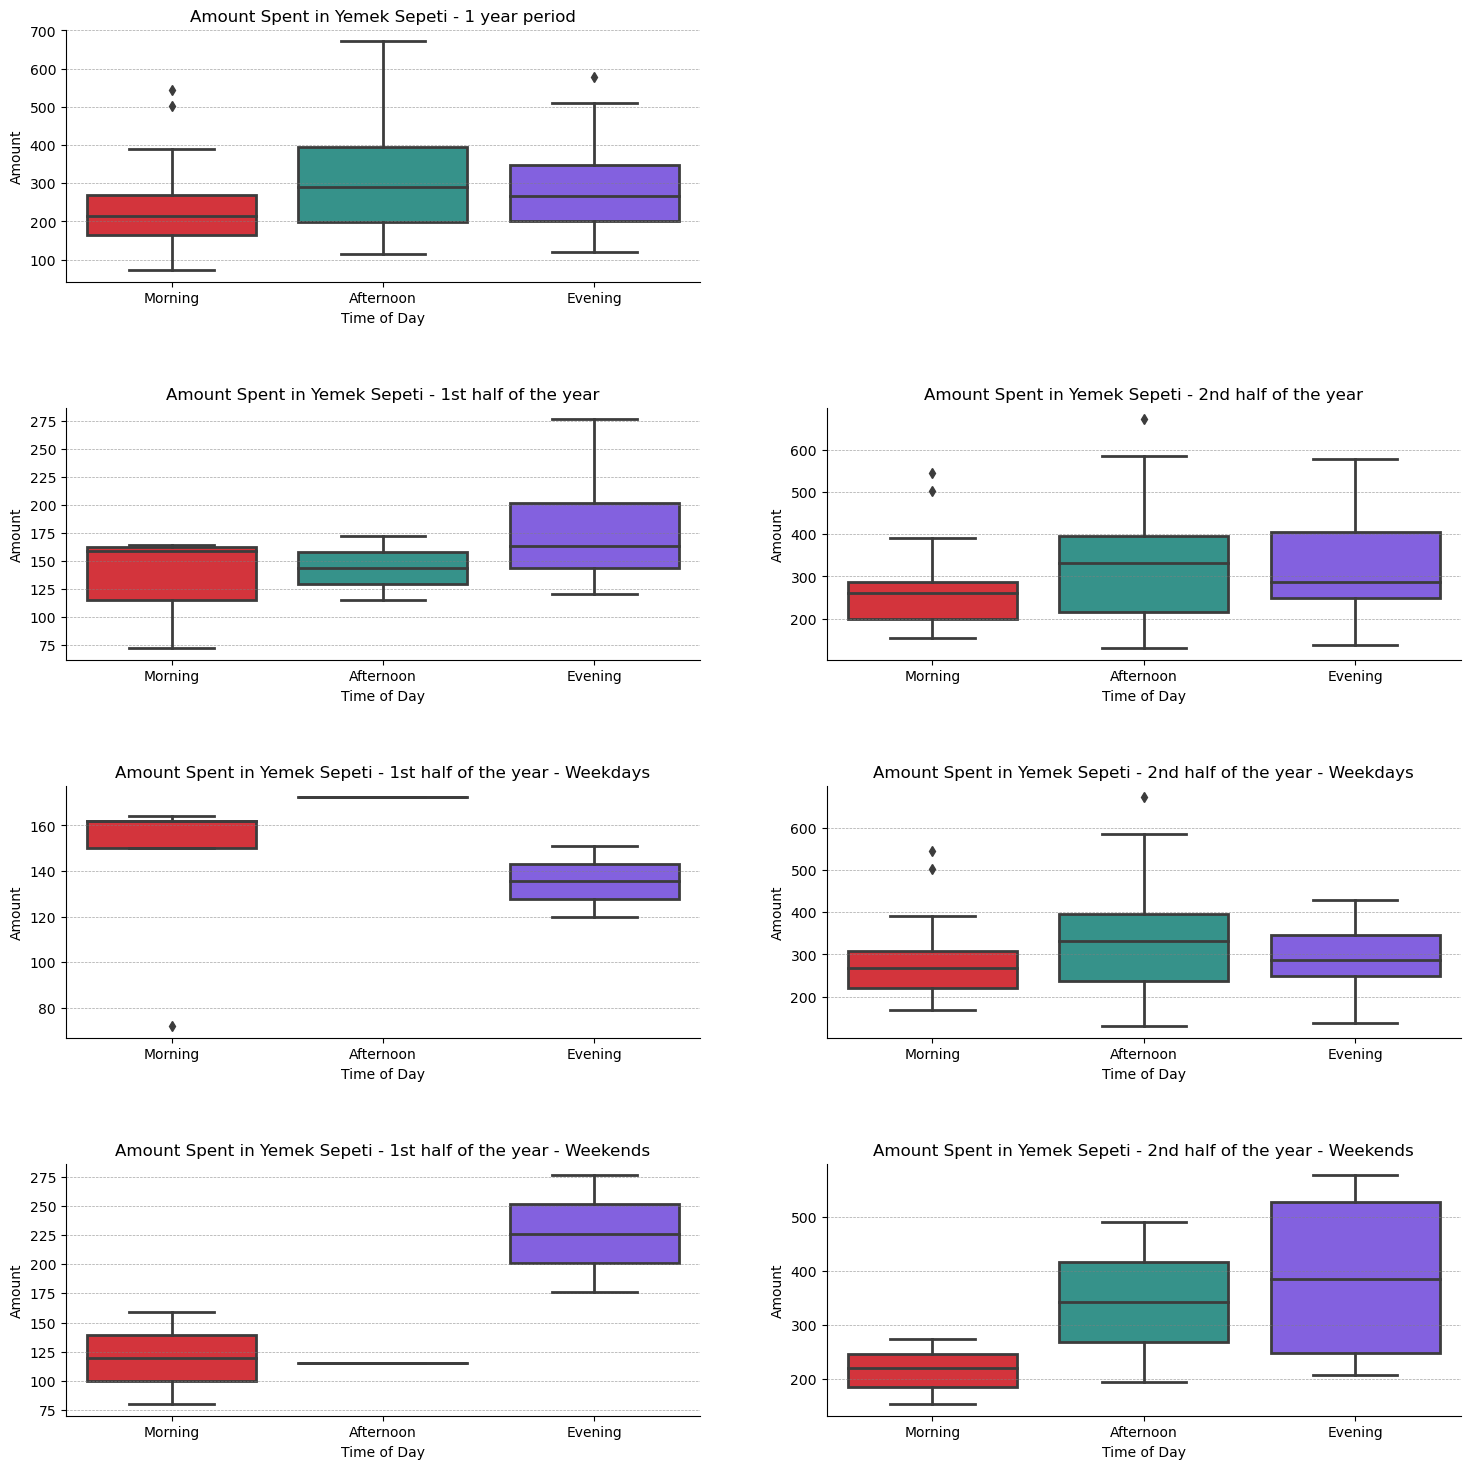

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns



# Create a function to plot the box plot for each subplot
def plot_yemeksepeti_boxplot(ax, df, title):
    yemeksepeti_df = df[df['Description'] == 'YEMEKSEPETİ']
    sns.boxplot(x='TimeOfDay', y='Amount', data=yemeksepeti_df, order=['Morning', 'Afternoon', 'Evening'], ax=ax, linewidth=2, palette = [ "#ed1a24", "#27a197", "#794cf4"])
    ax.set_title(title)
    ax.set_xlabel('Time of Day')
    ax.set_ylabel('Amount')
    ax.grid(axis='y', linestyle='--', alpha=0.7, color='gray', linewidth=0.5)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)

# Create a 2x4 grid of subplots
fig = plt.figure(figsize=(18, 18))
gs = gridspec.GridSpec(4, 2, width_ratios=[1, 1], wspace=0.2, hspace=0.5)

# Plot each subplot
ax1 = plt.subplot(gs[0, 0])
plot_yemeksepeti_boxplot(ax1, df, 'Amount Spent in Yemek Sepeti - 1 year period')

ax2 = plt.subplot(gs[1, 0])
plot_yemeksepeti_boxplot(ax2, df_first, 'Amount Spent in Yemek Sepeti - 1st half of the year')

ax3 = plt.subplot(gs[1, 1])
plot_yemeksepeti_boxplot(ax3, df_second, 'Amount Spent in Yemek Sepeti - 2nd half of the year')

ax4 = plt.subplot(gs[2, 0])
plot_yemeksepeti_boxplot(ax4, first_weekday_df, 'Amount Spent in Yemek Sepeti - 1st half of the year - Weekdays')

ax5 = plt.subplot(gs[3, 0])
plot_yemeksepeti_boxplot(ax5, first_weekend_df, 'Amount Spent in Yemek Sepeti - 1st half of the year - Weekends')

ax6 = plt.subplot(gs[2, 1])
plot_yemeksepeti_boxplot(ax6, second_weekday_df, 'Amount Spent in Yemek Sepeti - 2nd half of the year - Weekdays')

ax7 = plt.subplot(gs[3, 1])
plot_yemeksepeti_boxplot(ax7, second_weekend_df, 'Amount Spent in Yemek Sepeti - 2nd half of the year - Weekends')


plt.show()

In general, I tend to spend less on food from Yemek Sepeti in the mornings.

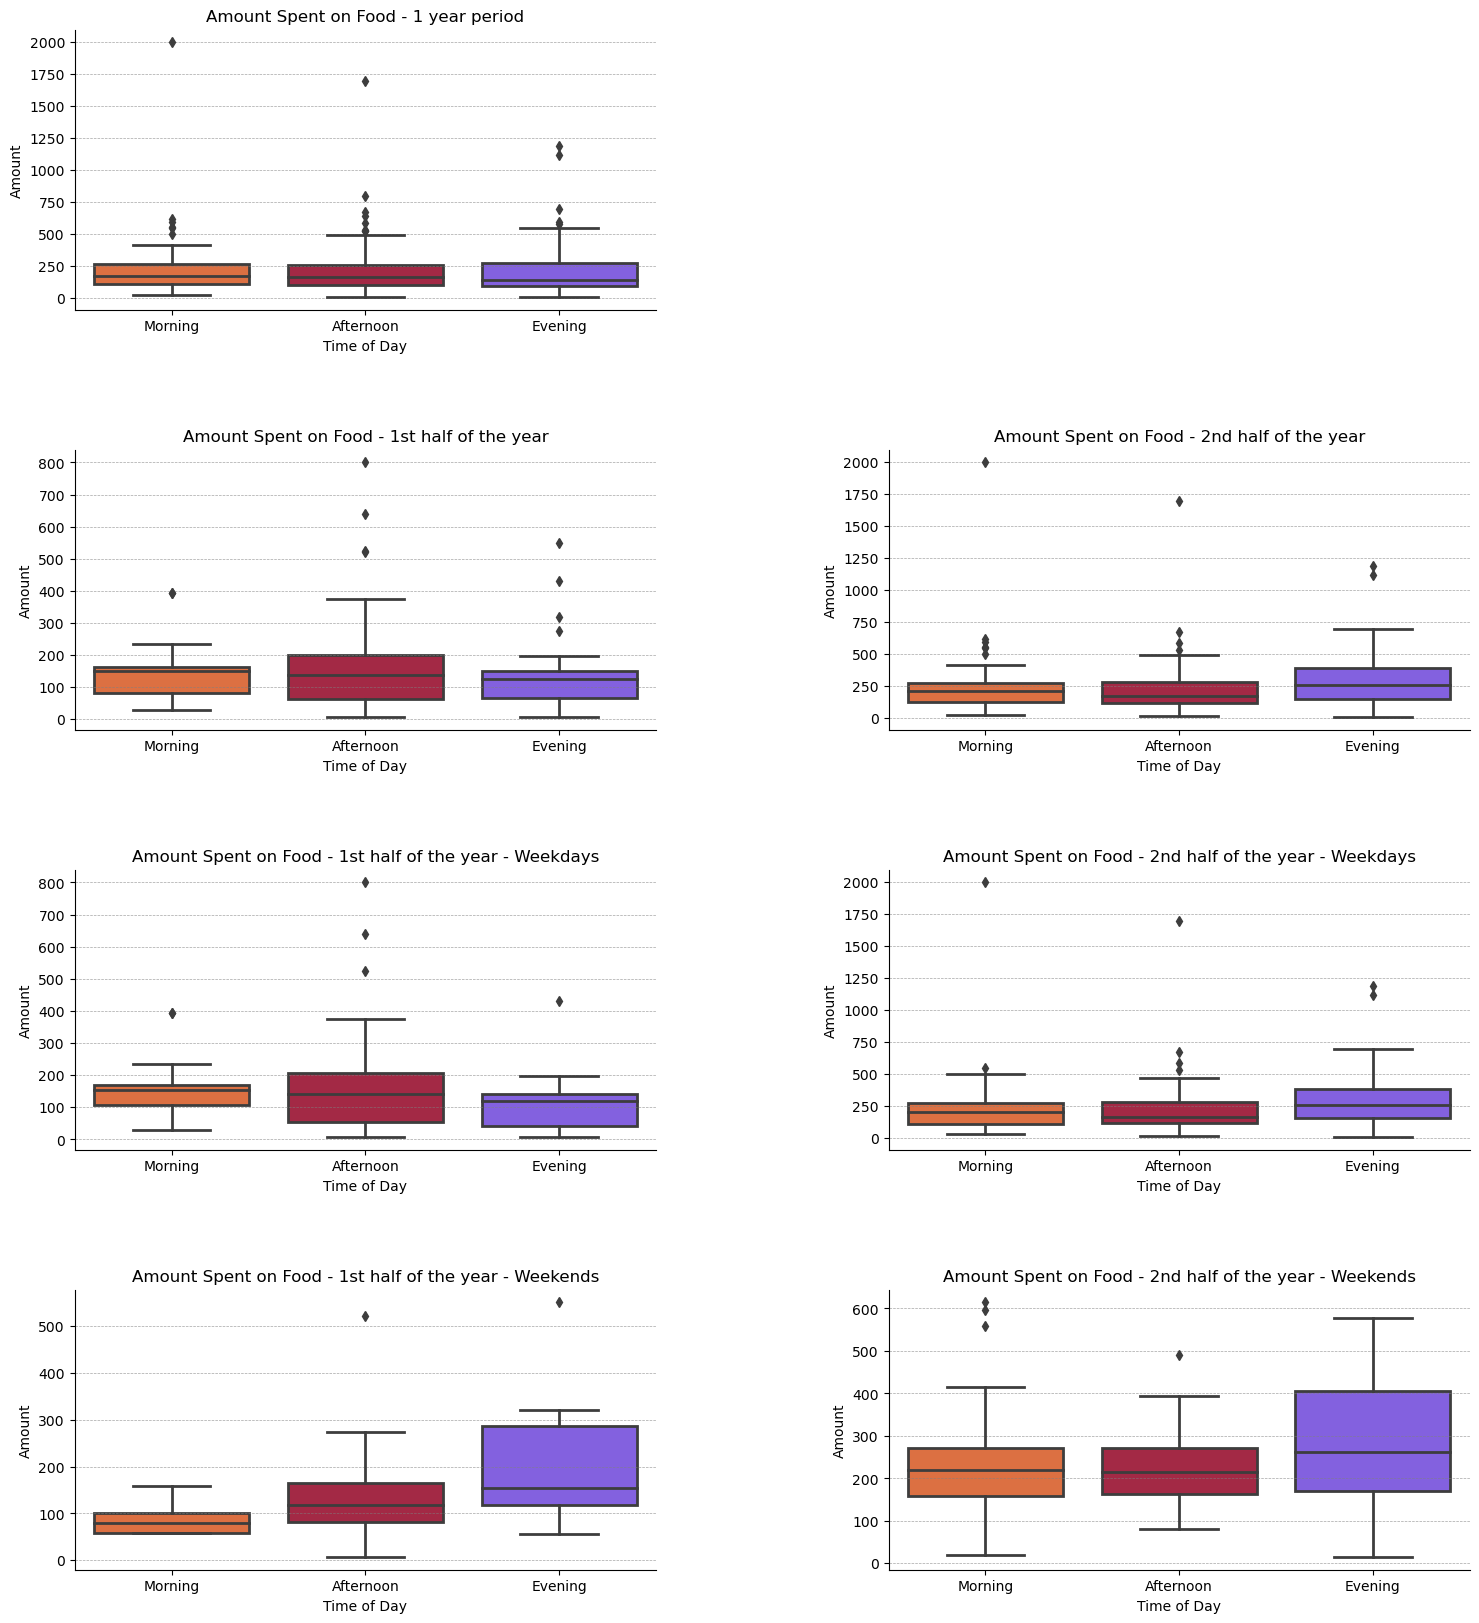

In [15]:
def plot_food_category_boxplot(ax, df, title):
    food_df = df[(df['Category'] == 'Food') & (df['Description'] != 'FASSHANE')] 
    sns.boxplot(x='TimeOfDay', y='Amount', data=food_df, order=['Morning', 'Afternoon', 'Evening'], ax=ax, linewidth=2, palette = [ "#f66528", "#b7153a", "#794cf4"])
    ax.set_title(title)
    ax.set_xlabel('Time of Day')
    ax.set_ylabel('Amount')
    ax.grid(axis='y', linestyle='--', alpha=0.7, color='gray', linewidth=0.5)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)

# Create a 2x4 grid of subplots
fig = plt.figure(figsize=(18, 20))
gs = gridspec.GridSpec(4, 2, width_ratios=[1, 1], wspace=0.4, hspace=0.5)

# Plot each subplot
ax1 = plt.subplot(gs[0, 0])
plot_food_category_boxplot(ax1, df, 'Amount Spent on Food - 1 year period')

ax2 = plt.subplot(gs[1, 0])
plot_food_category_boxplot(ax2, df_first, 'Amount Spent on Food - 1st half of the year')

ax3 = plt.subplot(gs[1, 1])
plot_food_category_boxplot(ax3, df_second, 'Amount Spent on Food - 2nd half of the year')

ax4 = plt.subplot(gs[2, 0])
plot_food_category_boxplot(ax4, first_weekday_df, 'Amount Spent on Food - 1st half of the year - Weekdays')

ax5 = plt.subplot(gs[3, 0])
plot_food_category_boxplot(ax5, first_weekend_df, 'Amount Spent on Food - 1st half of the year - Weekends')

ax6 = plt.subplot(gs[2, 1])
plot_food_category_boxplot(ax6, second_weekday_df, 'Amount Spent on Food - 2nd half of the year - Weekdays')

ax7 = plt.subplot(gs[3, 1])
plot_food_category_boxplot(ax7, second_weekend_df, 'Amount Spent on Food - 2nd half of the year - Weekends')


plt.show()

Compared to Yemek Sepeti, when we look at general food spending, there are more outliers when I eat outside of home.

During weekends, I tend to spend more on food in the evenings.

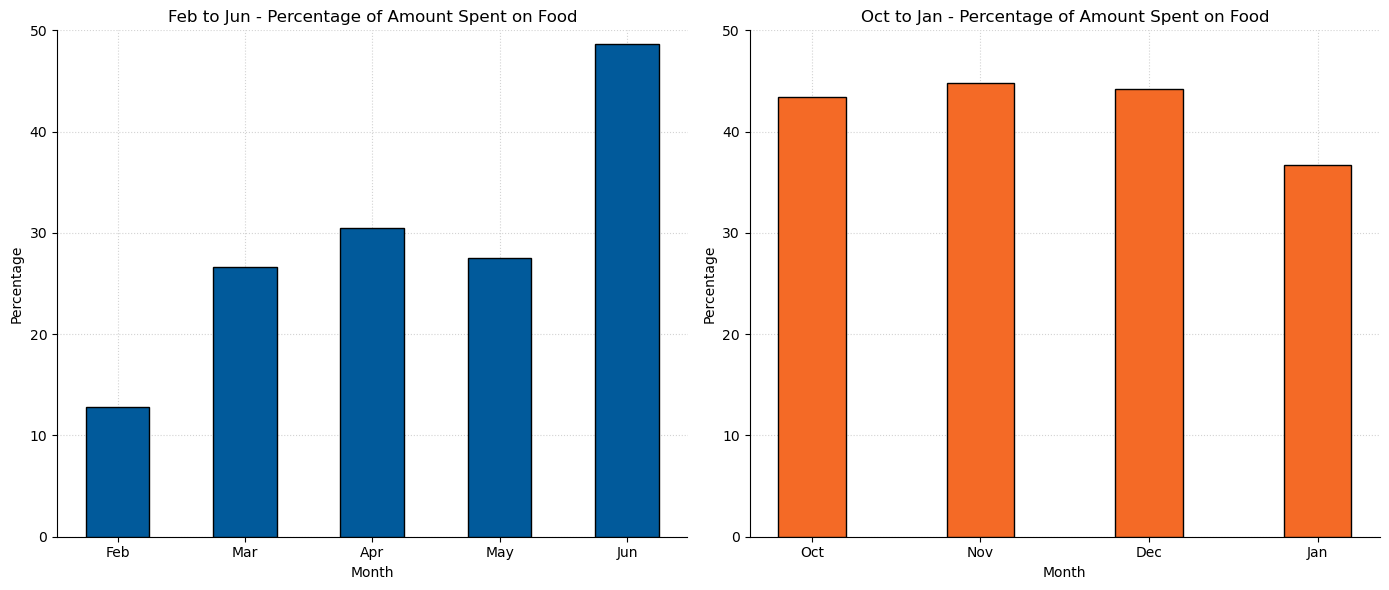

In [16]:
import matplotlib.pyplot as plt

# Create a function to calculate the percentage of the amount spent on 'Food' for a specific month
def calculate_food_percentage(df):
    total_amount = df['Amount'].sum()
    food_amount = df[df['Category'] == 'Food']['Amount'].sum()
    return (food_amount / total_amount) * 100


monthly_dfs = [group for _, group in df.groupby(df['Date'].dt.month)]
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

first_plot_months = ['Feb', 'Mar', 'Apr', 'May', 'Jun']
first_plot_dfs = [month_df for month, month_df in zip(month_names, monthly_dfs) if month in first_plot_months]
first_plot_percentages = [calculate_food_percentage(month_df) for month_df in first_plot_dfs]

second_plot_months = ['Oct', 'Nov', 'Dec', 'Jan']
second_plot_dfs = [month_df for month, month_df in zip(month_names, monthly_dfs) if month in second_plot_months]
second_plot_percentages = [calculate_food_percentage(month_df) for month_df in second_plot_dfs]

# Plotting
plt.figure(figsize=(14, 6))

# First plot
ax1 = plt.subplot(1, 2, 1)
ax1.bar(first_plot_months, first_plot_percentages, color='#015a9b', ec="black", zorder=3, width=0.5)
ax1.set_title('Feb to Jun - Percentage of Amount Spent on Food')
ax1.set_xlabel('Month')
ax1.set_ylabel('Percentage')
ax1.set_ylim(0, 50)
ax1.spines["top"].set(visible=False)
ax1.spines["right"].set(visible=False)
ax1.grid(True, color="lightgrey", ls=":")

# Second plot
ax2 = plt.subplot(1, 2, 2)
ax2.bar(second_plot_months, second_plot_percentages, color='#f46a26', ec="black", zorder=3, width=0.4)
ax2.set_title('Oct to Jan - Percentage of Amount Spent on Food')
ax2.set_xlabel('Month')
ax2.set_ylabel('Percentage')
ax2.set_ylim(0, 50)
ax2.spines["top"].set(visible=False)
ax2.spines["right"].set(visible=False)
ax2.grid(True, color="lightgrey", ls=":")

plt.tight_layout()
plt.show()

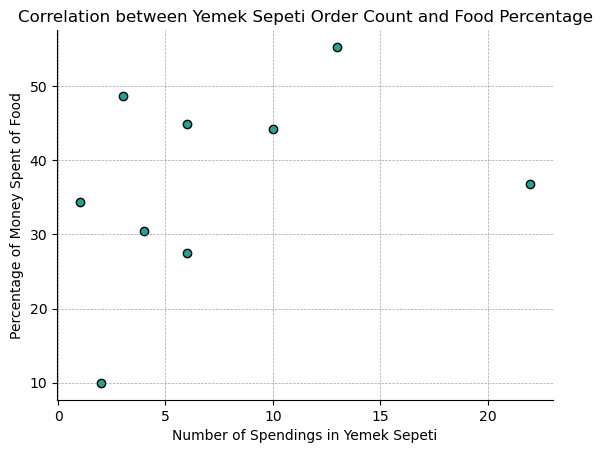

Spearman correlation between number of times spending at Yemek Sepeti and the percentage of money spent on food: 0.42678197846541877


In [17]:
import matplotlib.pyplot as plt

yemeksepeti_df = df[df['Description'] == 'YEMEKSEPETİ']
monthly_yemeksepeti_count = yemeksepeti_df.groupby('YearMonth').size().reset_index(name='YemeksepetiCount')

monthly_spending = df.groupby(['YearMonth', 'Category']).agg({'Amount': 'sum'}).unstack(fill_value=0)
monthly_spending.columns = monthly_spending.columns.droplevel()
monthly_spending.reset_index(inplace=True)

merged_data = pd.merge(monthly_yemeksepeti_count, monthly_spending, on='YearMonth', how='left')

merged_data['TotalAmount'] = merged_data.drop(['YearMonth', 'YemeksepetiCount'], axis=1).sum(axis=1)
merged_data['FoodPercentage'] = (merged_data['Food'] / merged_data['TotalAmount']) * 100


correlation = merged_data[['YemeksepetiCount', 'FoodPercentage']].corr(method='spearman').iloc[0, 1]

# Scatter plot
scatter = plt.scatter(merged_data['YemeksepetiCount'], merged_data['FoodPercentage'], color='#27a197', edgecolors='black')
plt.title('Correlation between Yemek Sepeti Order Count and Food Percentage')
plt.xlabel('Number of Spendings in Yemek Sepeti')
plt.ylabel('Percentage of Money Spent of Food')
plt.grid(True, linestyle='--', alpha=0.7, color='gray', linewidth=0.5)  # Add grid lines

# Access the Axes object and set spines
ax = plt.gca()
ax.spines["top"].set(visible=False)
ax.spines["right"].set(visible=False)

plt.show()

print(f"Spearman correlation between number of times spending at Yemek Sepeti and the percentage of money spent on food: {correlation}")

This positive Spearman correlation coefficient suggests that there is a moderate positive relationship between the count of Yemek Sepeti transactions and the proportion of spending on food. In other words, as the count of Yemek Sepeti transactions increases, there tends to be a moderate increase in the percentage of spending on food.

# Cafe Habits

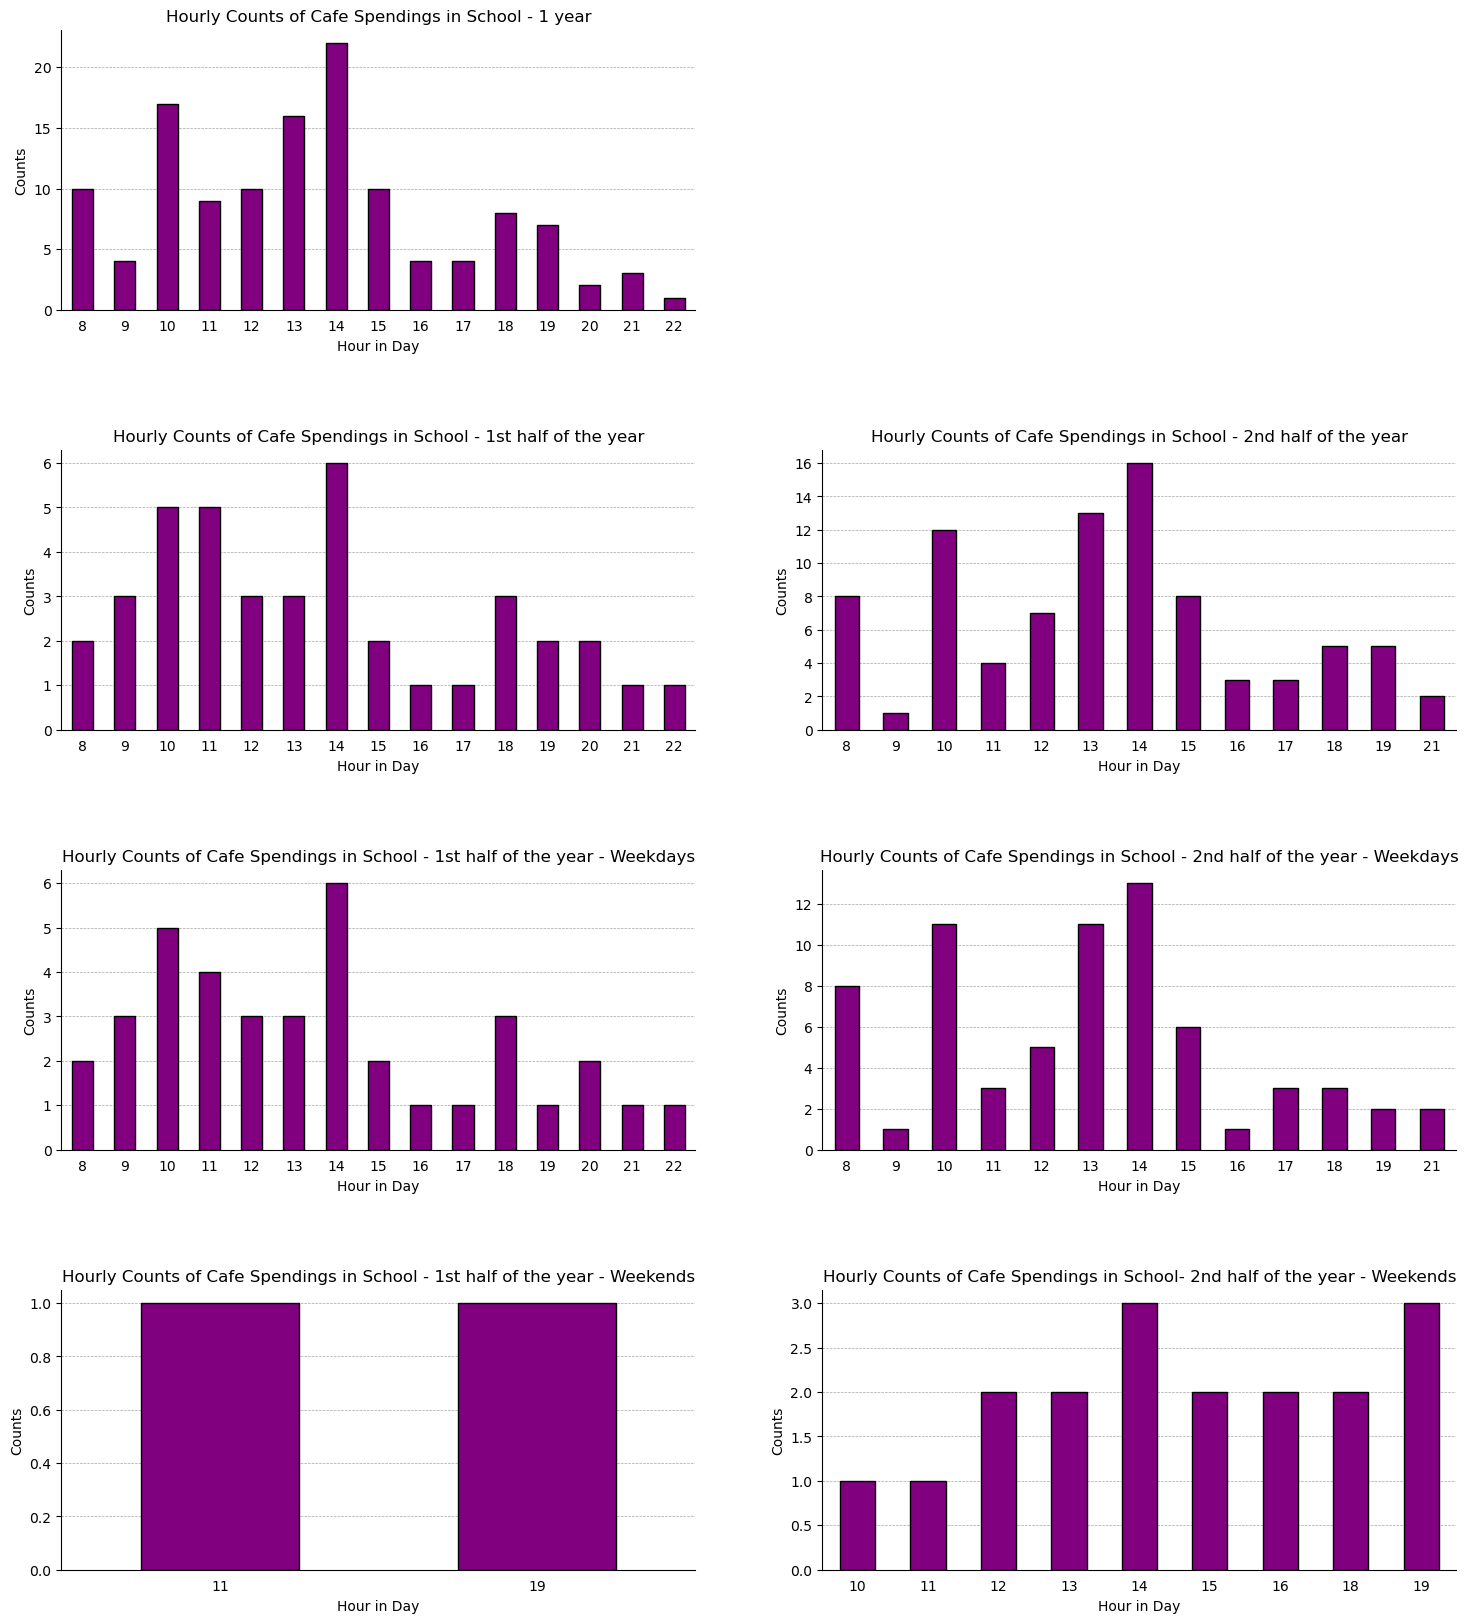

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Function to plot hourly counts of cafes
def plot_hourly_counts(ax, df, title):
    selected_descriptions = ["SABANCI COFFY", "FASSHANE", "ESPRESSOLAB"]
    selected_rows = df[df['Description'].isin(selected_descriptions)]
    hourly_counts = selected_rows.groupby('Hour').size()
    hourly_counts.plot(kind='bar', color='purple', ax=ax, ec = "black", zorder = 3)
    ax.set_title(title)
    ax.set_xlabel('Hour in Day')
    ax.set_ylabel('Counts')
    ax.set_xticklabels(hourly_counts.index, rotation=0)
    ax.tick_params(axis='x', which='both', bottom=False, top=False)
    ax.grid(axis='y', linestyle='--', alpha=0.7, color='gray', linewidth=0.5) 
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)

# Create a 2x2 grid of subplots
fig = plt.figure(figsize=(18, 20))
gs = gridspec.GridSpec(4, 2, width_ratios=[1, 1], wspace=0.2, hspace=0.5) 

# Plot each subplot
ax1 = plt.subplot(gs[0, 0])
plot_hourly_counts(ax1, df, 'Hourly Counts of Cafe Spendings in School - 1 year')

ax2 = plt.subplot(gs[1, 0])
plot_hourly_counts(ax2, df_first, 'Hourly Counts of Cafe Spendings in School - 1st half of the year')

ax3 = plt.subplot(gs[1, 1])
plot_hourly_counts(ax3, df_second, 'Hourly Counts of Cafe Spendings in School - 2nd half of the year')

ax4 = plt.subplot(gs[2, 0])
plot_hourly_counts(ax4, first_weekday_df, 'Hourly Counts of Cafe Spendings in School - 1st half of the year - Weekdays')

ax5 = plt.subplot(gs[2, 1])
plot_hourly_counts(ax5, second_weekday_df, 'Hourly Counts of Cafe Spendings in School - 2nd half of the year - Weekdays')

ax6 = plt.subplot(gs[3, 0])
plot_hourly_counts(ax6, first_weekend_df, 'Hourly Counts of Cafe Spendings in School - 1st half of the year - Weekends')

ax7 = plt.subplot(gs[3, 1])
plot_hourly_counts(ax7, second_weekend_df, 'Hourly Counts of Cafe Spendings in School- 2nd half of the year - Weekends')


plt.show()

The number of times I drink coffee has significantly increased in the second half.

Distribution-wise, in the first term, I used to drink coffee more during daytime compared to the second term.

On weekends, I have started my day at later hours in the morning.

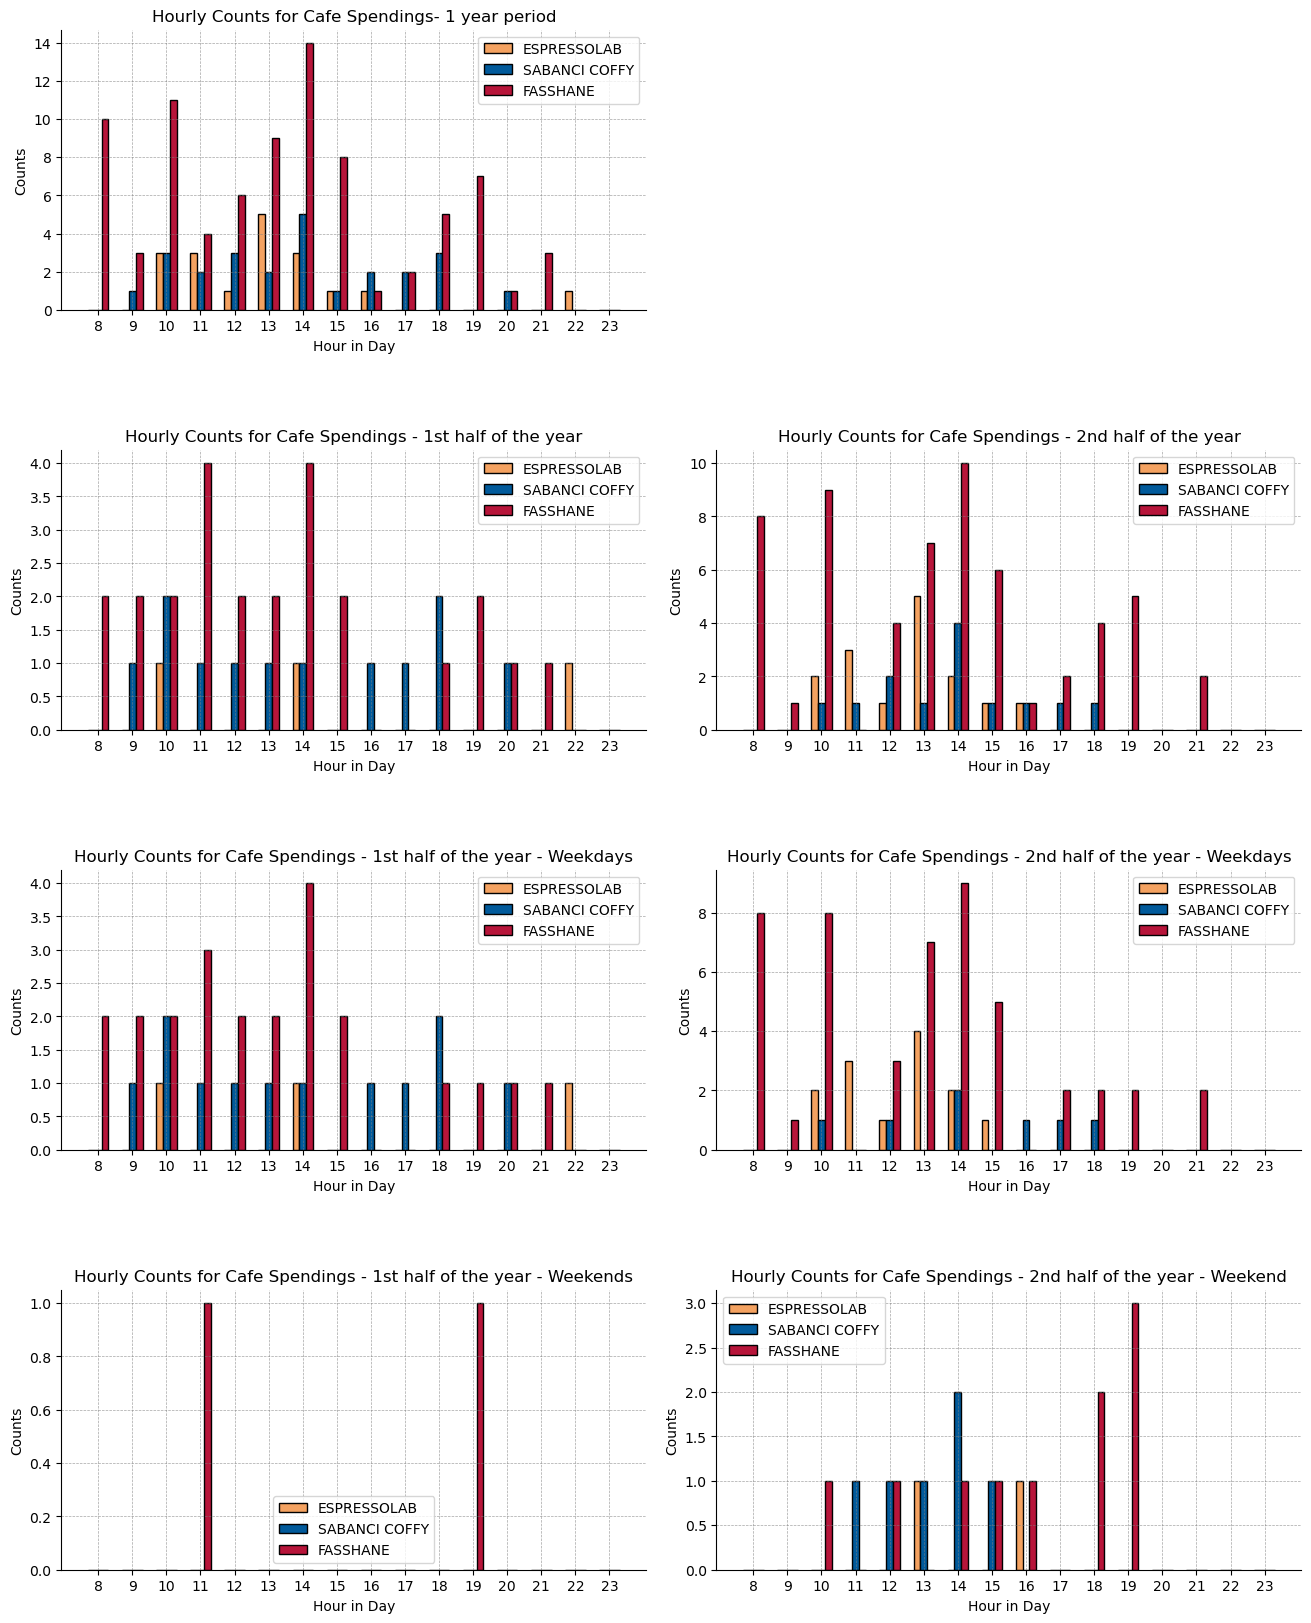

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

selected_descriptions = ["ESPRESSOLAB", "SABANCI COFFY", "FASSHANE" ]

# Function to plot hourly counts for selected descriptions
def plot_hourly_counts(ax, df, selected_descriptions, title):
    bar_width = 0.2 
    bar_positions = np.arange(8, 24) 
    colors=[ "#f4a261", "#015a9b", "#b7153a"]
    for i, description in enumerate(selected_descriptions):
        description_data = df[df['Description'] == description]
        hourly_counts = description_data.groupby('Hour').size()

        hourly_counts = hourly_counts.reindex(range(24), fill_value=0)

        ax.bar(bar_positions + i * bar_width, hourly_counts[8:], width=bar_width, label=description, color = colors[i], ec = "black")

    ax.set_title(title)
    ax.set_xlabel('Hour in Day')
    ax.set_ylabel('Counts')
    ax.legend()
    ax.set_xticks(bar_positions + bar_width * (len(selected_descriptions) - 1) / 2)
    ax.set_xticklabels(range(8, 24))
    ax.grid(True, linestyle='--', alpha=0.7, color='gray', linewidth=0.5) 
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)

# Create a 2x2 grid of subplots
fig = plt.figure(figsize=(16, 20))
gs = gridspec.GridSpec(4, 2, width_ratios=[1, 1], wspace=0.12, hspace=0.5) 

# Plot each subplot
ax1 = plt.subplot(gs[0, 0])
plot_hourly_counts(ax1, df, selected_descriptions, 'Hourly Counts for Cafe Spendings- 1 year period')

ax2 = plt.subplot(gs[1, 0])
plot_hourly_counts(ax2, df_first, selected_descriptions, 'Hourly Counts for Cafe Spendings - 1st half of the year')

ax3 = plt.subplot(gs[1, 1])
plot_hourly_counts(ax3, df_second, selected_descriptions, 'Hourly Counts for Cafe Spendings - 2nd half of the year')

ax4 = plt.subplot(gs[2, 0])
plot_hourly_counts(ax4, first_weekday_df, selected_descriptions, 'Hourly Counts for Cafe Spendings - 1st half of the year - Weekdays')

ax5 = plt.subplot(gs[2, 1])
plot_hourly_counts(ax5, second_weekday_df,selected_descriptions, 'Hourly Counts for Cafe Spendings - 2nd half of the year - Weekdays')

ax6 = plt.subplot(gs[3, 0])
plot_hourly_counts(ax6, first_weekend_df,selected_descriptions, 'Hourly Counts for Cafe Spendings - 1st half of the year - Weekends')

ax7 = plt.subplot(gs[3, 1])
plot_hourly_counts(ax7, second_weekend_df,selected_descriptions, 'Hourly Counts for Cafe Spendings - 2nd half of the year - Weekend')

plt.show()


I mostly buy coffee from Fasshane.

Even though I spend a lot of time in IC, it seems that I have chosen Fasshane over Coffy.

In the mornings, I prefer Fasshane's coffee over other options to wake up.

# Correlations

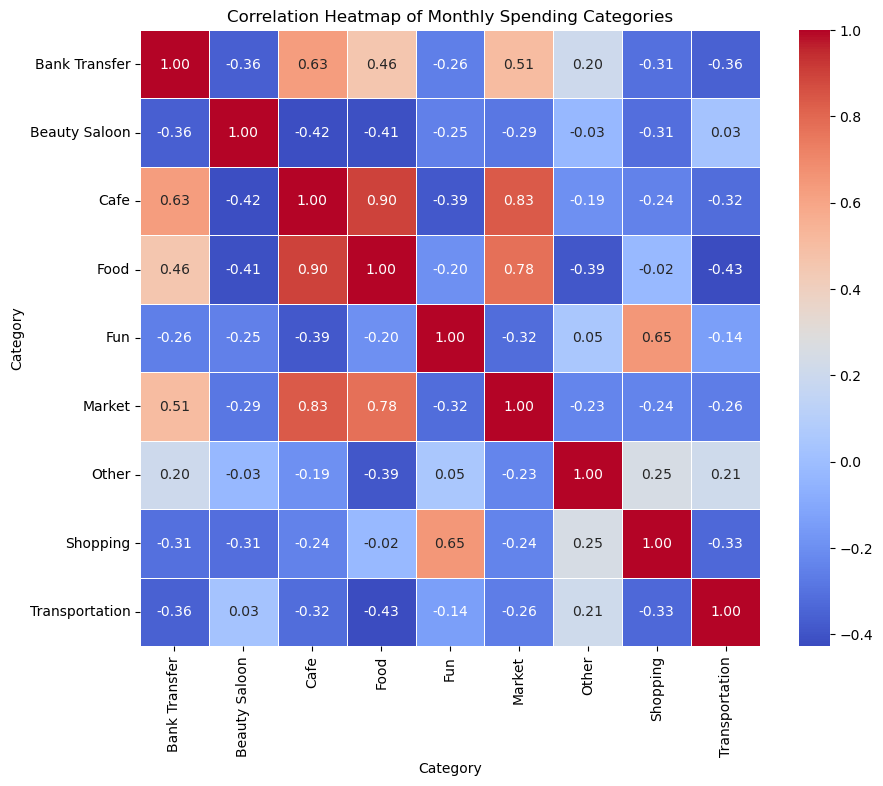

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total spending for each category and each month
category_monthly_spending = df.pivot_table(index='Month', columns='Category', values='Amount', aggfunc='sum', fill_value=0)

# Calculate the correlation matrix
correlation_matrix = category_monthly_spending.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Monthly Spending Categories')
plt.show()



The more I spend on food, the more I spend on cafes.

The more I spend on cafes, the more I spend on the market.

The more I spend on the market, the more I spend on food.

The more I spend on fun, the more I spend on shopping.

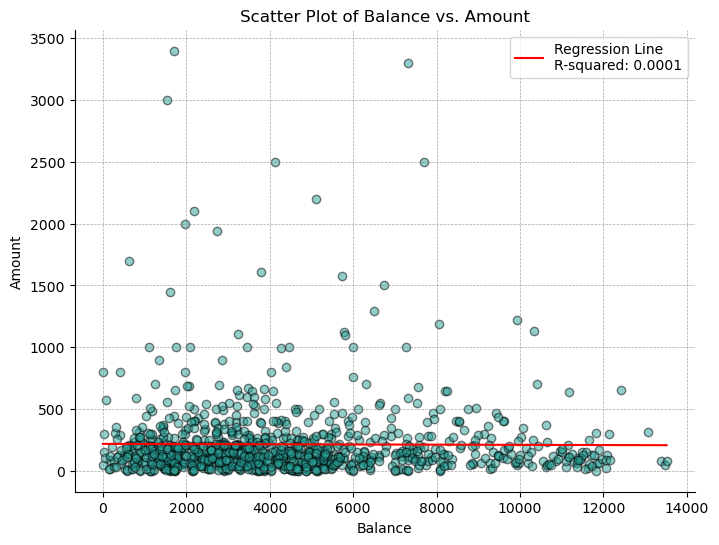

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Scatter plot of Balance vs. Amount for Shopping category
plt.figure(figsize=(8, 6))
plt.scatter(df['Balance'], df['Amount'], color='#27a197', edgecolors='black', alpha=0.5)
plt.title('Scatter Plot of Balance vs. Amount')
plt.xlabel('Balance')
plt.ylabel('Amount')
plt.grid(True, linestyle='--', alpha=0.7, color='gray', linewidth=0.5)

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(df['Balance'], df['Amount'])

# Generate points along the x-axis for the line
x_values = np.linspace(df['Balance'].min(), df['Balance'].max(), 200)
line = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, line, color='red', label=f'Regression Line\nR-squared: {r_value**2:.4f}')

ax = plt.gca()
ax.spines["top"].set(visible=False)
ax.spines["right"].set(visible=False)
plt.legend()

plt.show()


An R-squared value of 0.0001 in the scatter plot of balance vs. the amount spent indicates that there is a very weak linear relationship between the balance and the amount I spent. 

Therefore, regardless of the amount of money in my bank, my spending behavior doesn't significantly change in a predictable manner based on this linear relationship.

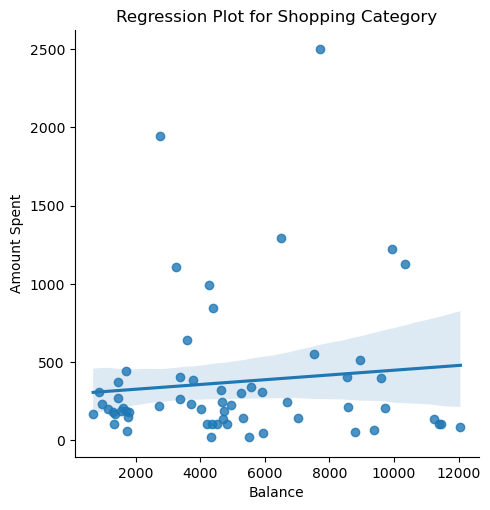

Correlation Coefficient: 0.10589431248456513
P-value: 0.41665489959469276


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

shopping_data = df[df['Category'] == 'Shopping']

# Create a scatter plot with regression line
sns.lmplot(x='Balance', y='Amount', data=shopping_data)

# Display the plot
plt.title('Regression Plot for Shopping Category')
plt.xlabel('Balance')
plt.ylabel('Amount Spent')
plt.show()

from scipy.stats import pearsonr


# Calculate correlation coefficient and p-value
corr_coefficient, p_value = pearsonr(shopping_data['Balance'], shopping_data['Amount'])

# Print the correlation coefficient
print(f"Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")


The correlation coefficient between the balance and the spending amount for the shopping is approximately 0.106. 
This value suggests a very weak positive correlation between the two variables. The p-value is also 0.417, 
which is greater than the common significance level of 0.05.

The high p-value indicates that we cannot reject the null hypothesis, and the correlation may not be statistically 
significant. In other words, there is not enough evidence to conclude that there is a significant linear relationship 
between the balance and the spending amount for the shopping.
